# Project: Customer Segmentation Using RFM in Python

### Objective:

#### Segment customers based on their purchasing behavior using RFM Analysis:

Recency: How recently a customer made a purchase

Frequency: How often they purchase

Monetary: How much they spend

#### This helps in identifying:

Loyal customers

At-risk customers

High-value customers

Churned users, etc.

In [35]:
##  Import Required Libraries

import pandas as pd
import datetime as dt

In [8]:
## Read and explore the data

In [6]:
df = pd.read_csv("D:\\Projects\\Customer Segmentation Using RFM in Python\\Dataset\\Online_Retail.csv", encoding='ISO-8859-1')

In [7]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
df["TotalAmount"] = df["Quantity"]*df["UnitPrice"]

In [10]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   TotalAmount  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalAmount         0
dtype: int64

In [ ]:
## Cleaning Data

In [20]:
df["Description"].fillna("Description not available",inplace=True)

In [21]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalAmount         0
dtype: int64

In [22]:
df.dropna(subset=["CustomerID"], inplace=True)

In [23]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [27]:
df.duplicated().sum()

5225

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

In [33]:
df = df[df["Quantity"] > 0]

In [ ]:
## Creating Reference Date (for Recency)

In [38]:
latest_date = df["InvoiceDate"].max()+ dt.timedelta(days=1)

TypeError: can only concatenate str (not "datetime.timedelta") to str

In [39]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

C:\Users\vj753\AppData\Local\Temp\ipykernel_30488\3012402086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [40]:
latest_date = df["InvoiceDate"].max() + dt.timedelta(days=1)

In [41]:
latest_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
## Building the RFM Table

In [43]:
rfm = df.groupby('CustomerID').agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,
    "InvoiceNo" : "nunique",
    "TotalAmount" : 'sum'
    
})

In [45]:
rfm.rename(columns={
     "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalAmount": "Monetary"
}, inplace=True)

In [46]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [ ]:
## Scoring Each RFM Metric

In [47]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1, 2, 3, 4])

In [48]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,7,4310.00,4,4,4
12348.0,75,4,1797.24,2,3,4
12349.0,19,1,1757.55,3,1,4
12350.0,310,1,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1
18281.0,181,1,80.82,1,2,1
18282.0,8,2,178.05,4,3,1


In [ ]:
## Creating RFM Segments

In [49]:
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)


In [50]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,114
12347.0,2,7,4310.00,4,4,4,444
12348.0,75,4,1797.24,2,3,4,234
12349.0,19,1,1757.55,3,1,4,314
12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121
18281.0,181,1,80.82,1,2,1,121
18282.0,8,2,178.05,4,3,1,431


In [ ]:
## Segment Customers

In [51]:
def segment(x):
    if x == "444": return "Best Customers"
    elif x.startswith("4"): return "Loyal Customers"
    elif x.endswith("4"): return "Big Spenders"
    elif x.startswith("1"): return "At Risk"
    else: return "Others"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)


In [52]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,Big Spenders
12347.0,2,7,4310.00,4,4,4,444,Best Customers
12348.0,75,4,1797.24,2,3,4,234,Big Spenders
12349.0,19,1,1757.55,3,1,4,314,Big Spenders
12350.0,310,1,334.40,1,1,2,112,At Risk
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121,At Risk
18281.0,181,1,80.82,1,2,1,121,At Risk
18282.0,8,2,178.05,4,3,1,431,Loyal Customers


In [ ]:
## Visualizing Segments

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

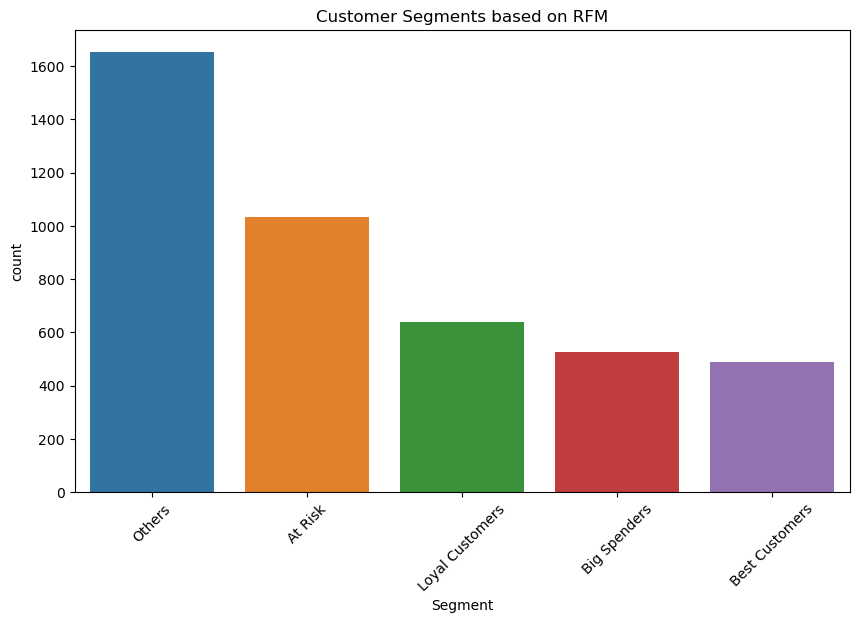

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index)
plt.title("Customer Segments based on RFM")
plt.xticks(rotation=45)
plt.show()